# MLP on XOR-Gate

After seeing that a single perceptron cannot be trained to correctly predict an XOR-Gate we now try to solve this problem with a MLP.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / 1 + np.exp(-x)

def sigmoid_derivative(x):
    return x * (1-x)

def mean_squared_error(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mean_squared_error_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def binary_crossentropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

def binary_crossentropy_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + 1e-8)

In [40]:
# Neural Network
class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01):
        self.layers = layers
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.loss_history = []

        # Initialize weights and biases and multiply by 0.1 to reduce the initial variance
        for i in range(len(layers) - 1):
            weight = np.random.randn(layers[i], layers[i + 1]) * 0.1
            bias = np.zeros(layers[i + 1])
            self.weights.append(weight)
            self.biases.append(bias)
    
    # 1. Multiply the input by the weights 2. Add the bias 3. Apply the activation function
    def predict(self, X):
        self.activations = [X]
        output = X
        for i in range(len(self.weights)):
            output = relu(np.dot(output, self.weights[i]) + self.biases[i])
            self.activations.append(output)
        return output
    
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs + 1):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute loss
            loss = mean_squared_error(y, y_pred)
            self.loss_history.append(loss)
            
            # Backward pass
            d_loss = mean_squared_error_derivative(y, y_pred)
            for i in reversed(range(len(self.weights))):
                dW = np.dot(self.activations[i].T, d_loss)
                dB = np.mean(d_loss, axis=0)
                
                # Compute the gradient of the loss with respect to the output of the previous layer
                if i != 0:
                    d_loss = np.dot(d_loss, self.weights[i].T) * relu_derivative(self.activations[i])

                self.weights[i] -= self.learning_rate * dW
                self.biases[i] -= self.learning_rate * dB
            
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: Loss = {loss:.4f}')

In [41]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [42]:
nn = NeuralNetwork(layers=[2, 10, 1], learning_rate=0.01)
nn.train(X, y, epochs=1000)

predicted_probs = nn.predict(X).flatten()
predicted_classes = (predicted_probs >= 0.5).astype(int)

print("Predicted Probabilities:", predicted_probs)
print("Predicted Classes:", predicted_classes)
print("True Labels:", y.flatten())

Epoch 0: Loss = 0.5000
Epoch 100: Loss = 0.2533
Epoch 200: Loss = 0.2494
Epoch 300: Loss = 0.2451
Epoch 400: Loss = 0.2369
Epoch 500: Loss = 0.2216
Epoch 600: Loss = 0.1963
Epoch 700: Loss = 0.1631
Epoch 800: Loss = 0.1266
Epoch 900: Loss = 0.0896
Epoch 1000: Loss = 0.0560
Predicted Probabilities: [0.36414304 0.80599756 0.81868404 0.13920117]
Predicted Classes: [0 1 1 0]
True Labels: [0 1 1 0]


Our MLP correctly predicts the XOR-Gate! Now we plot the decision boundary and the loss function.

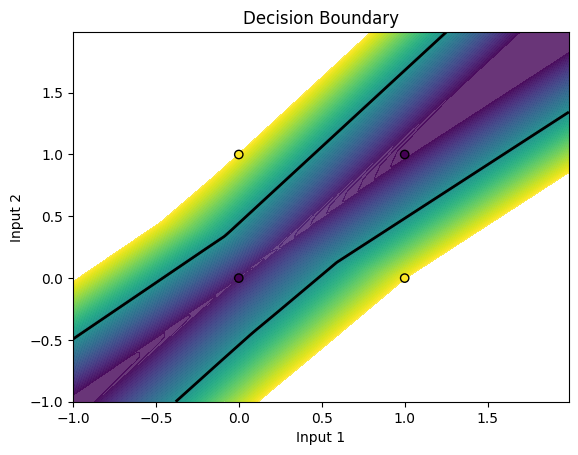

In [37]:
def plot_decision_boundary(model, X, y, threshold=0.5):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 100), alpha=0.8)
    plt.contour(xx, yy, Z, levels=[threshold], colors='black', linewidths=2)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Decision Boundary')

    plt.show()

plot_decision_boundary(nn, X, y)

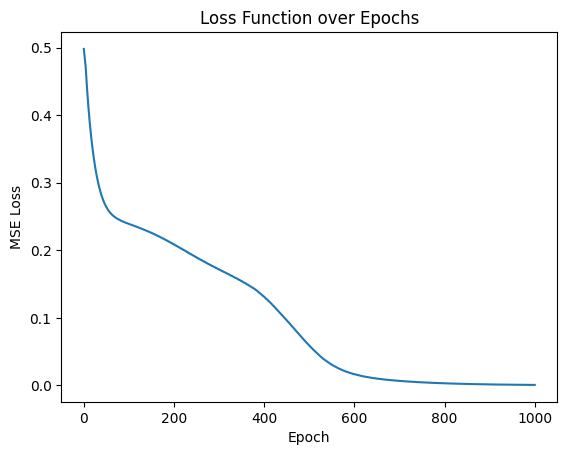

In [38]:
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.title("Loss Function over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.show()

plot_loss(nn.loss_history)